In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install neuron
!pip install netpyne
!pip install bluepysnap
!pip install h5py

     |████████████████████████████████| 12.6 MB 226 kB/s 
     |████████████████████████████████| 312 kB 5.1 MB/s 
     |████████████████████████████████| 60 kB 3.2 MB/s 
     |████████████████████████████████| 2.5 MB 10.0 MB/s 
     |████████████████████████████████| 1.8 MB 45.5 MB/s 
     |████████████████████████████████| 1.5 MB 43.6 MB/s 
     |████████████████████████████████| 474 kB 47.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for bluepysnap: filename=bluepysnap-0.13.0-py3-none-any.whl size=77260 sha256=5c698fdff38b2fa8f53f8f4b20f76e735f2c7fdabc583582c8c07cd66cb3b6a0
  Stored in directory: /root/.cache/pip/wheels/62/18/55/893e18a34bf00ea8e0b5c4e2aa282758c855bad328d7f3dff5
  Created wheel for morph-tool: filename=morph_tool-2.9.0-py3-none-any.whl size=55271 sha256=5a5bb673c566728cd0da14025e49ba866b3f517c688e002daf69b24ffa97c1c4
  St

In [ ]:
os.chdir('/content/gdrive/MyDrive/CA1_netpyne/sim/PySpike')

In [ ]:
# !git clone https://github.com/mariomulansky/PySpike.git
!cd /content/gdrive/MyDrive/CA1_netpyne/sim/PySpike
!pip install PySpike
#!python setup.py build_ext --inplace

     |████████████████████████████████| 1.5 MB 5.2 MB/s 
  ERROR: Failed building wheel for PySpike
  Running setup.py clean for PySpike
Failed to build PySpike
    Running setup.py install for PySpike ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dxmjh0wb/pyspike_520ceb58069c4caaab3c97c6624d45aa/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dxmjh0wb/pyspike_520ceb58069c4caaab3c97c6624d45aa/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-n_u9b0ew/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/PySpike Check the logs for full command output.


In [ ]:
os.chdir('/content/gdrive/MyDrive/CA1_netpyne/sim/')

In [ ]:
!nrnivmodl modfiles

/content/gdrive/MyDrive/CA1_netpyne/sim
Mod files: "modfiles/cacummb.mod" "modfiles/cacumm.mod" "modfiles/cagk.mod" "modfiles/cal2.mod" "modfiles/can2.mod" "modfiles/cat.mod" "modfiles/DetAMPANMDA.mod" "modfiles/DetGABAAB.mod" "modfiles/h.mod" "modfiles/kadist.mod" "modfiles/kaprox.mod" "modfiles/kca.mod" "modfiles/kd2.mod" "modfiles/kdb.mod" "modfiles/kdrbca1.mod" "modfiles/kdrca1.mod" "modfiles/kmb.mod" "modfiles/na3n.mod" "modfiles/naxn.mod" "modfiles/ProbAMPANMDA_EMS.mod" "modfiles/ProbGABAAB_EMS.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.7/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.7/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./cacummb.o ./cacumm.o ./cagk.o ./cal2.o ./can2.o ./ca

# Importar dados

In [ ]:
import h5py
import numpy as np
import pandas as pd

In [ ]:
f = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/edges/edges.h5', 'r')
f1 = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/nodes/nodes.h5', 'r')
f2 = h5py.File('/content/gdrive/MyDrive/ca1data/connhipp_mc2r100.h5', 'r')

In [ ]:
imc2r100 = list(f2['edges'])

In [ ]:
import json

with open("/content/gdrive/MyDrive/ca1data/proj_mtypes.txt", "r") as fp:
  proj_mtypes = json.load(fp)

with open("/content/gdrive/MyDrive/ca1data/source_mtypes.txt", "r") as fp:
  source_mtypes = json.load(fp)

with open("/content/gdrive/MyDrive/ca1data/target_mtypes.txt", "r") as fp:
  target_mtypes = json.load(fp)

In [ ]:
mc2r100_projections, syns_per_projection = np.unique(proj_mtypes, return_counts=True)

In [ ]:
with open('/content/gdrive/MyDrive/ca1data/connhipp_mc2r100.json', "r") as fp:
  parameters = json.load(fp)

In [ ]:
syndata_exc = pd.read_csv('/content/gdrive/MyDrive/ca1data/syndata_exc.csv')
syndata_exc

,connType,tau_r_AMPA,tau_d_AMPA,std_tau_d_AMPA,tau_r_NMDA,tau_d_NMDA,std_tau_d_NMDA,Use,Use_std,Dep,Dep_std,Fac,Fac_std,gmax,NMDA_ratio
0,SP_PC:SP_BS,0.50,4.12,NaN,NaN,148.50,0.09,0.23,0.09,410.0,11.0,10.0,0.10,1.65,0.28
1,SP_PC:SP_CCKBC,0.50,4.12,NaN,NaN,298.75,0.09,0.23,0.09,410.0,11.0,10.0,0.40,3.50,0.86
2,SP_PC:SP_Ivy,0.50,4.12,NaN,NaN,NaN,NaN,NaN,0.02,617.0,5.0,17.0,0.40,2.30,NaN
3,SP_PC:SP_PVBC,0.50,4.12,NaN,NaN,NaN,NaN,NaN,0.09,410.0,11.0,10.0,0.05,2.00,NaN
4,SP_PC:SO_Tri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SP_PC:SLM_PPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SP_PC:SO_BP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SP_PC:SR_SCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SP_PC:SP_AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SP_PC:SP_PC,0.02,3.00,NaN,NaN,148.50,0.02,0.50,0.02,671.0,5.0,17.0,0.10,0.60,1.22


In [ ]:
exc_parameters = ['tau_r_AMPA', 'tau_d_AMPA', 'tau_r_NMDA', 'tau_d_NMDA', 'Use', 'Dep', 'Fac', 'gmax', 'NMDA_ratio']
exc_values = [0.2, 1.7, 9.0, 61.0, 1.0, 100, 10, 0.001, 1.22]

In [ ]:
index = 0

for exc_parameter in exc_parameters:
  syndata_exc[exc_parameter] = syndata_exc[exc_parameter].fillna(exc_values[index])
  index = index + 1

In [ ]:
projs = np.unique(proj_mtypes)
proj_mtypes = np.array(proj_mtypes)

conductance = []
conductance_std = []

decay_time = []
decay_time_std = []

u_syn = []
u_syn_std = []

depression_time = []
depression_time_std = []

facilitation_time = []
facilitation_time_std = []

delay = []

n_rrp_vesicles = []


for proj in projs:
  conductance.append(np.mean(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
  conductance_std.append(np.std(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
  
  decay_time.append(np.mean(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))
  decay_time_std.append(np.std(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))

  u_syn.append(np.mean(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
  u_syn_std.append(np.std(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
  
  depression_time.append(np.mean(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))
  depression_time_std.append(np.std(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))

  facilitation_time.append(np.mean(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))
  facilitation_time_std.append(np.std(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))

  delay.append(np.mean(np.array(parameters['edges']['delay'])[np.where(proj_mtypes==proj)[0]]))

  n_rrp_vesicles.append(np.mean(np.array(parameters['edges']['n_rrp_vesicles'])[np.where(proj_mtypes==proj)[0]]))

In [ ]:
ca1_data = {}

ca1_data['projections'] = projs

ca1_data['conductance'] = conductance
ca1_data['conductance_std'] = conductance_std

ca1_data['decay_time'] = decay_time
ca1_data['decay_time_std'] = decay_time_std

ca1_data['u_syn'] = u_syn
ca1_data['u_syn_std'] = u_syn_std

ca1_data['depression_time'] = depression_time
ca1_data['depression_time_std'] = depression_time_std

ca1_data['facilitation_time'] = facilitation_time
ca1_data['facilitation_time_std'] = facilitation_time_std

ca1_data['delay'] = delay

ca1_data['n_rrp_vesicles'] = n_rrp_vesicles

In [ ]:
ca1 = pd.DataFrame(ca1_data)
ca1

,projections,conductance,conductance_std,decay_time,decay_time_std,u_syn,u_syn_std,depression_time,depression_time_std,facilitation_time,facilitation_time_std,delay,n_rrp_vesicles
0,SO_OLM:SP_AA,2.104232,0.000000,3.755018,0.000000,0.242182,0.000000,970.475769,0.000000,2.471480,0.000000,2.801647,1.000000
1,SO_OLM:SP_CCKBC,2.399427,0.408276,3.538907,0.302290,0.272408,0.014554,893.913137,166.814924,2.538732,0.651951,3.445044,1.000000
2,SO_OLM:SP_Ivy,1.796479,0.000000,4.111326,0.000000,0.296343,0.000000,735.527771,0.000000,1.209852,0.000000,1.619893,1.000000
3,SO_OLM:SP_PC,1.301133,0.292598,8.256472,1.252592,0.292250,0.042354,1250.358671,478.156400,1.393509,7.989495,2.970877,1.000000
4,SO_OLM:SP_PVBC,2.006640,0.280588,3.938897,0.306470,0.271850,0.016311,914.320261,324.381963,1.561192,0.519227,3.183522,1.000000
5,SP_AA:SP_PC,2.359104,0.201813,6.172159,0.329252,0.099954,0.005380,1323.949509,688.963228,9.082943,5.554694,1.718687,1.000000
6,SP_BS:SO_OLM,2.023530,0.000000,3.887870,0.000000,0.293733,0.000000,928.251892,0.000000,1.006596,0.000000,1.786806,1.000000
7,SP_BS:SP_AA,1.952848,0.000000,4.197608,0.000000,0.280584,0.000000,1290.307007,0.000000,1.511477,0.000000,1.975520,1.000000
8,SP_BS:SP_CCKBC,2.303933,0.120949,3.354564,0.080909,0.264033,0.011101,789.931449,163.701531,1.149324,0.511845,1.398152,1.000000
9,SP_BS:SP_Ivy,2.052334,0.153531,3.768102,0.432922,0.240833,0.022357,960.343443,204.302078,1.436493,0.519473,1.318847,1.000000


In [ ]:
os.chdir('/content/gdrive/MyDrive/CA1_netpyne/sim')

In [ ]:
from netpyne import specs

cfg = specs.SimConfig()		

#------------------------------------------------------------------------------
# Options
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 1131.0			            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1333, 'stim': 1333, 'loc': 1333} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'
cfg.saveFolder = '../data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# ploting
#------------------------------------------------------------------------------
cfg.analysis['plotTraces'] = {'include': [0,1,2,3,4,5,6,7,8,9,10,11], 'timeRange': [400,cfg.duration], 'ylim': [-90,30], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
cfg.analysis['plotShape'] = {'includePre': [n for n in range(0,24,1)],'includePost': [n for n in range(0,24,1)], 'includeAxon': False, 'saveFig': True, 'showFig': True, 'figSize':(22,22)}
cfg.analysis['plot2Dnet'] = {'view':'xy','saveFig': '../data/'+cfg.simLabel[0:9]+'/'+cfg.simLabel +'_xy_.png', 'showFig': True, 'figSize':(16,16), 'fontSize': 10}



In [ ]:
from netpyne import sim # specs
# from neuron import gui
import matplotlib.pyplot as plt
import numpy as np

from loadinfosfromBBP import *

netParams = specs.NetParams()

# try:
#     from __main__ import cfg  # import SimConfig object with params from parent module
# except:
#     from cfg import cfg
#------------------------------------------------------------------------------
# POPULATION PARAMETERS	
#------------------------------------------------------------------------------
# layer_heights = (0, 170, 230, 510, 660)
# layers = ('SO', 'SP', 'SR', 'SLM')
layer = {'SO':[0.0, 0.258], 'SP':[0.258, 0.348], 'SR':[0.348, 0.773], 'SLM':[0.773, 1.0], 'CA3':[2.0,3.0], 'EC':[3.0, 4.0]}  # normalized layer boundaries

# full import
scalepopNum = 0.002

# mc2 import
netParams.shape = 'cylinder' # cylindrical (column-like) volume
area = (3*np.sqrt(3)*240**2)/2 # six triag l = 240, h =  240*np.sqrt(3)/2
diam = 2*np.sqrt(area/np.pi) #equiv circle
netParams.sizeX=diam
netParams.sizeZ=diam
netParams.sizeY=660

#------------------------------------------------------------------------------
Ca1_cellNumber = 0
for mtype in Mtypelist:    
    popNumber[mtype] = int(np.ceil(popNumber[mtype]*scalepopNum))
    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
print (popNumber)

#------------------------------------------------------------------------------
# to debug
popNumber['SP_PC'] = int(1)
Ca1_cellNumber = 0
for mtype in Mtypelist:    
    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
print (popNumber)

#------------------------------------------------------------------------------
# IMPORT CELL PARAMETERS
#------------------------------------------------------------------------------
popLabel = {}
cellParamLabels = []
cellNumber = {}
# gid_list = [18097, 18109, 18140, 18149, 18163, 18177,18189, 18191, 16950, 16963, 17199, 17202, 
# 						17411, 17416, 17486, 17497, 13513, 14311, 17946, 17958, 22, 25, 1, 3]
# gid_list = gid_list - np.ones_like(gid_list) # start from 1 in original list

gid_list_mc2 = load_gid_list_mc2_Column()

gid_list_mc2 = [24, 25, 67, 110, 112, 156, 247, 278, 359, 414, 451, 474, 523, 556, 561, 593, 714, 717, 751, 769, 800, 810, 883, 991, 1001, 1084, 1112, 1124, 1176, 1177, 1197, 1248, 1255, 1335, 1381, 1410, 1492, 1493, 1497, 1557, 1596, 1674, 1783, 1819, 1866, 1942, 1987, 2001, 2011, 2045, 2073, 2099, 2115, 2118, 2120, 2210, 2245, 2266, 2316, 2342, 2408, 2440, 2561, 2575, 2576, 2611, 2651, 2673, 2697, 2712, 2751, 2761, 2779, 2810, 2826, 2871, 2872, 2893, 2997, 3095, 3108, 3139, 3154, 3241, 3330, 3434, 3454, 3519, 3539, 3600, 3608, 3612, 3648, 3674, 3694, 3698, 3703, 3782, 3840, 3865, 3867, 3938, 4084, 4091, 4097, 4108, 4116, 4118, 4127, 4156, 4206, 4228, 4266, 4295, 4298, 4322, 4338, 4353, 4389, 4431, 4440, 4447, 4466, 4475, 4553, 4559, 4591, 4617, 4688, 4796, 4842, 4853, 4914, 4915, 4934, 4941, 4945, 4960, 4977, 5044, 5112, 5181, 5208, 5271, 5276, 5280, 5285, 5488, 5524, 5531, 5540, 5589, 5592, 5596, 5653, 5670, 5677, 5731, 5775, 5855, 5975, 6092, 6158, 6165, 6242, 6276, 6392, 6473, 6476, 6488, 6505, 6531, 6536, 6588, 6626, 6632, 6689, 6707, 6712, 6721, 6754, 6783, 6788, 6959, 6964, 7000, 7024, 7053, 7076, 7081, 7143, 7163, 7221, 7226, 7235, 7266, 7269, 7338, 7342, 7385, 7400, 7427, 7510, 7547, 7604, 7624, 7645, 7669, 7673, 7738, 7832, 7888, 7893, 7912, 7993, 8082, 8085, 8110, 8132, 8154, 8330, 8335, 8351, 8414, 8465, 8503, 8531, 8559, 8662, 8740, 8758, 8786, 8795, 8813, 8833, 8852, 8918, 8950, 8957, 8963, 9039, 9059, 9082, 9091, 9101, 9116, 9175, 9188, 9212, 9255, 9285, 9380, 9396, 9411, 9477, 9488, 9493, 9502, 9532, 9543, 9630, 9654, 9665, 9685, 9703, 9716, 9774, 9803, 9814, 9842, 9879, 9886, 10016, 10024, 10093, 10102, 10110, 10119, 10195, 10242, 10355, 10356, 10357, 10400, 10414, 10505, 10556, 10577, 10592, 10682, 10774, 10824, 10827, 10849, 10855, 10881, 10889, 10919, 10965, 10997, 11005, 11015, 11017, 11024, 11117, 11137, 11196, 11197, 11243, 11244, 11282, 11286, 11401, 11404, 11416, 11470, 11474, 11480, 11494, 11497, 11522, 11532, 11540, 11589, 11609, 11616, 11622, 11734, 11793, 11844, 11864, 11875, 11958, 11982, 11998, 12000, 12018, 12053, 12195, 12204, 12216, 12244, 12424, 12465, 12553, 12578, 12667, 12671, 12685, 12762, 12767, 12835, 12838, 12933, 12935, 12941, 12943, 12963, 13017, 13069, 13161, 13183, 13185, 13203, 13284, 13296, 13324, 13329, 13352, 13441, 13512, 13517, 13524, 13564, 13611, 13634, 13650, 13658, 13689, 13728, 13824, 13860, 13957, 13965, 13970, 13990, 14020, 14094, 14134, 14161, 14232, 14243, 14262, 14275, 14310, 14322, 14379, 14488, 14532, 14545, 14589, 14590, 14641, 14675, 14691, 14718, 14738, 14751, 14764, 14773, 14827, 14887, 14895, 14908, 14912, 15000, 15005, 15010, 15028, 15050, 15059, 15060, 15067, 15081, 15094, 15121, 15151, 15169, 15178, 15220, 15224, 15264, 15272, 15275, 15332, 15376, 15404, 15426, 15432, 15437, 15475, 15501, 15544, 15578, 15609, 15616, 15627, 15630, 15676, 15733, 15757, 15854, 15878, 15955, 15956, 15963, 16027, 16032, 16033, 16160, 16180, 16220, 16245, 16255, 16426, 16499, 16505, 16541, 16562, 16640, 16658, 16690, 16716, 16753, 16787, 16791, 16831, 16895, 16926, 16962, 16967, 17035, 17040, 17074, 17089, 17092, 17093, 17116, 17137, 17170, 17178, 17198, 17211, 17222, 17246, 17305, 17339, 17384, 17422, 17514, 17516, 17562, 17614, 17631, 17676, 17686, 17816, 17820, 17844, 17870, 17991, 18018, 18060, 18108]
	
cellmtype = []
for mtype in Mtypelist:

	gid_list = load_gid_list(mtype)		

	gid_mtype = []
	for gid in gid_list:
		if gid in gid_list_mc2 and np.size(gid_mtype)<popNumber[mtype]:
			gid_mtype.append(gid) # start from 0 in h5
			# gid_mtype.append(gid-1) # start from 1 in original list

	
	for gid in gid_mtype:
		MorphoName = nodesinfo['morphology'][gid] + '.swc'
		hocName = nodesinfo['model_template'][gid][4:]  
		cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
		cellmtype.append(nodesinfo['mtype'][gid])

		if cellName in cellParamLabels:
			cellNumber[cellName[:-2]] = cellNumber[cellName[:-2]] + 1
			cellName = cellName[:-2] + '_' + str(cellNumber[cellName[:-2]]-1) # [cell_0,cell_1] cellNumber = 2
		else:
			cellNumber[cellName[:-2]] = 1

		cellParamLabels.append(cellName)
		popLabel[cellName] = nodesinfo['mtype'][gid]

		print('%s  gid = %d hoc = %s swc = %s cellmtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))

		cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
			conds={'cellType': cellName, 'cellModel': 'HH_full'},
			fileName='cellwrapper.py',
			cellName='loadCell',
			cellInstance = True,
			cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
		netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')

  # 'SLM_PPA': # No SLM in mc2, import from mc3 (mc5 or mc6 are avaliable too) -> gid = 0  
  # 'SO_BP': # No SO_BP in mc2, import from mc3 (mcX are avaliable too) -> gid = 18193  
  # 'SO_Tri': # No SO_Tri in mc2(r=100), import from mc2 (r>100) gid = 18152
  # 'SO_BS': # No SO_BS in mc2(r=100, import from mc2 (r>100) -> gid = 18139
for gid in [0, 18193, 18152, 18139]:
  MorphoName = nodesinfo['morphology'][gid] + '.swc'
  hocName = nodesinfo['model_template'][gid][4:]  
  cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
  cellmtype.append(nodesinfo['mtype'][gid])
  cellNumber[cellName[:-2]] = 1

  cellParamLabels.append(cellName)
  popLabel[cellName] = nodesinfo['mtype'][gid]

  print('%s  gid = %d hoc = %s swc = %s mtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))

  cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
    conds={'cellType': cellName, 'cellModel': 'HH_full'},
    fileName='cellwrapper.py',
    cellName='loadCell',
    cellInstance = True,
    cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
  netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')


#------------------------------------------------------------------------------
#Amount of cells in the network
#------------------------------------------------------------------------------
for cellName in cellParamLabels:
	celllayer = cellName.split('_')[0]
	netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'ynormRange': layer[celllayer], 'cellModel': 'HH_full'}

#------------------------------------------------------------------------------
# DESCRIPTION OF SYNAPTIC MECHANISMS	
#------------------------------------------------------------------------------
Epops = pd.unique(nodesinfo[nodesinfo['synapse_class'] == 'EXC']['mtype'])
Ipops = pd.unique(nodesinfo[nodesinfo['synapse_class'] == 'INH']['mtype'])

for pre in Epops:
    for post in Mtypelist:
        proj = '%s:%s' % (pre, post)

        if proj in mc2r100_projections:

          syndata_proj = ca1[ca1['projections']==proj]


          netParams.synMechParams[proj] = {'mod': 'DetAMPANMDA',
                                          'tau_d_AMPA': float(syndata_proj['decay_time']), 
                                          'Use': float(syndata_proj['u_syn']), 
                                          'Dep': float(syndata_proj['depression_time']), 
                                          'Fac': float(syndata_proj['facilitation_time'])
                                          }
          
          if proj in np.array(syndata_exc['connType']):
            netParams.synMechParams[proj]['tau_d_NMDA'] = syndata_exc['tau_d_NMDA'][np.where(np.array(syndata_exc['connType'])==proj)[0][0]]
            netParams.synMechParams[proj]['NMDA_ratio'] = syndata_exc['tau_d_NMDA'][np.where(np.array(syndata_exc['connType'])==proj)[0][0]]

for pre in Ipops:
    for post in Mtypelist:
        proj = '%s:%s' % (pre, post)

        if proj in mc2r100_projections:

          syndata_proj = ca1[ca1['projections']==proj]


          netParams.synMechParams[proj] = {'mod': 'DetGABAAB',
                                          'tau_d_GABAA': float(syndata_proj['decay_time']),
                                          'Use': float(syndata_proj['u_syn']), 
                                          'Dep': float(syndata_proj['depression_time']), 
                                          'Fac': float(syndata_proj['facilitation_time'])
                                          }

#------------------------------------------------------------------------------
#	NETWORK CONNECTIONS	
#------------------------------------------------------------------------------
#for pre in cellParamLabels:
#	for post in cellParamLabels:
#		synMech = '%s:%s' % (popLabel[pre], popLabel[post])
#
#		if synMech in mc2r100_projections:
#
#			netParams.connParams[pre + '->' + post] = {
#				'preConds': {'pop': pre},
#				'postConds': {'pop': post},
#				# 'sec': postsynDict[postsynList[i]],
#				'synsPerConn': 10,
#				'synMech': synMech,
#				'weight': 1.0,
#				'delay': float(ca1['delay'][ca1['projections']==synMech])
#				}
#
#------------------------------------------------------------------------------
# Stimulus
#------------------------------------------------------------------------------
durationstim = 400.0
delaystim = 531.0
timesimulation = 1131.0
ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
step_number = 7
netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}

#durationstim = 20.0
#delaystim = 2.0
#timesimulation = 10.0
##ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
##ampstim =  [0.8, 0.6, 0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
#
##step_number = 4
##netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
#netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': 'uniform(0.5, 1.0)'}
#netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}


scalepopNum = 0.002   Ca1_cellNumber = 45
{'SO_OLM': 1, 'SO_Tri': 1, 'SO_BP': 1, 'SP_CCKBC': 1, 'SP_AA': 1, 'SR_SCA': 1, 'SO_BS': 1, 'SP_BS': 1, 'SP_PVBC': 1, 'SP_Ivy': 1, 'SP_PC': 34, 'SLM_PPA': 1}
scalepopNum = 0.002   Ca1_cellNumber = 12
{'SO_OLM': 1, 'SO_Tri': 1, 'SO_BP': 1, 'SP_CCKBC': 1, 'SP_AA': 1, 'SR_SCA': 1, 'SO_BS': 1, 'SP_BS': 1, 'SP_PVBC': 1, 'SP_Ivy': 1, 'SP_PC': 1, 'SLM_PPA': 1}
SO_OLM_cAC_mc2_0  gid = 18060 hoc = CA1_int_cAC_011017HP2_2019032814552 swc = 011017HP2_height_195.swc cellmtype = ['SO_OLM']
SP_CCKBC_cAC_mc2_0  gid = 17198 hoc = CA1_int_cAC_031031AM1_2019032815001 swc = 031031AM1_-_Scale_x1.000_y0.900_z1.000.swc cellmtype = ['SO_OLM', 'SP_CCKBC']
SP_AA_bAC_mc2_0  gid = 17514 hoc = CA1_int_bAC_011017HP2_2019032911530 swc = 970911C_-_Scale_x1.000_y0.950_z1.000_-_Clone_2.swc cellmtype = ['SO_OLM', 'SP_CCKBC', 'SP_AA']
SR_SCA_cAC_mc2_0  gid = 24 hoc = CA1_int_cAC_990611HP2_2019032816214 swc = 990611HP2_-_Scale_x1.000_y0.900_z1.000.swc cellmtype = ['SO_OLM', 'SP_CC

In [ ]:
#from netpyne import sim # specs
## from neuron import gui
#import matplotlib.pyplot as plt
#import numpy as np
#
#from loadinfosfromBBP import *
#
#netParams = specs.NetParams()
#
## try:
##     from __main__ import cfg  # import SimConfig object with params from parent module
## except:
##     from cfg import cfg
##------------------------------------------------------------------------------
## POPULATION PARAMETERS	
##------------------------------------------------------------------------------
## layer_heights = (0, 170, 230, 510, 660)
## layers = ('SO', 'SP', 'SR', 'SLM')
#layer = {'SO':[0.0, 0.258], 'SP':[0.258, 0.348], 'SR':[0.348, 0.773], 'SLM':[0.773, 1.0], 'CA3':[2.0,3.0], 'EC':[3.0, 4.0]}  # normalized layer boundaries
#
## full import
#scalepopNum = 0.002
#
## mc2 import
#netParams.shape = 'cylinder' # cylindrical (column-like) volume
#area = (3*np.sqrt(3)*240**2)/2 # six triag l = 240, h =  240*np.sqrt(3)/2
#diam = 2*np.sqrt(area/np.pi) #equiv circle
#netParams.sizeX=diam
#netParams.sizeZ=diam
#netParams.sizeY=660
#
##------------------------------------------------------------------------------
#Ca1_cellNumber = 0
#for mtype in Mtypelist:    
#    popNumber[mtype] = int(np.ceil(popNumber[mtype]*scalepopNum))
#    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]
#
#print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
#print (popNumber)
#
##------------------------------------------------------------------------------
## to debug
#popNumber['SP_PC'] = int(1)
#Ca1_cellNumber = 0
#for mtype in Mtypelist:    
#    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

#print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
#print (popNumber)
#
##------------------------------------------------------------------------------
## IMPORT CELL PARAMETERS
##------------------------------------------------------------------------------
#popLabel = {}
#cellParamLabels = []
#cellNumber = {}
## gid_list = [18097, 18109, 18140, 18149, 18163, 18177,18189, 18191, 16950, 16963, 17199, 17202, 
## 						17411, 17416, 17486, 17497, 13513, 14311, 17946, 17958, 22, 25, 1, 3]
## gid_list = gid_list - np.ones_like(gid_list) # start from 1 in original list
#
#gid_list_mc2 = load_gid_list_mc2_Column()
#
#gid_list_mc2 = [24, 25, 67, 110, 112, 156, 247, 278, 359, 414, 451, 474, 523, 556, 561, 593, 714, 717, 751, 769, 800, 810, 883, 991, 1001, 1084, 1112, 1124, 1176, 1177, 1197, 1248, 1255, 1335, 1381, 1410, 1492, 1493, 1497, 1557, 1596, 1674, 1783, 1819, 1866, 1942, 1987, 2001, 2011, 2045, 2073, 2099, 2115, 2118, 2120, 2210, 2245, 2266, 2316, 2342, 2408, 2440, 2561, 2575, 2576, 2611, 2651, 2673, 2697, 2712, 2751, 2761, 2779, 2810, 2826, 2871, 2872, 2893, 2997, 3095, 3108, 3139, 3154, 3241, 3330, 3434, 3454, 3519, 3539, 3600, 3608, 3612, 3648, 3674, 3694, 3698, 3703, 3782, 3840, 3865, 3867, 3938, 4084, 4091, 4097, 4108, 4116, 4118, 4127, 4156, 4206, 4228, 4266, 4295, 4298, 4322, 4338, 4353, 4389, 4431, 4440, 4447, 4466, 4475, 4553, 4559, 4591, 4617, 4688, 4796, 4842, 4853, 4914, 4915, 4934, 4941, 4945, 4960, 4977, 5044, 5112, 5181, 5208, 5271, 5276, 5280, 5285, 5488, 5524, 5531, 5540, 5589, 5592, 5596, 5653, 5670, 5677, 5731, 5775, 5855, 5975, 6092, 6158, 6165, 6242, 6276, 6392, 6473, 6476, 6488, 6505, 6531, 6536, 6588, 6626, 6632, 6689, 6707, 6712, 6721, 6754, 6783, 6788, 6959, 6964, 7000, 7024, 7053, 7076, 7081, 7143, 7163, 7221, 7226, 7235, 7266, 7269, 7338, 7342, 7385, 7400, 7427, 7510, 7547, 7604, 7624, 7645, 7669, 7673, 7738, 7832, 7888, 7893, 7912, 7993, 8082, 8085, 8110, 8132, 8154, 8330, 8335, 8351, 8414, 8465, 8503, 8531, 8559, 8662, 8740, 8758, 8786, 8795, 8813, 8833, 8852, 8918, 8950, 8957, 8963, 9039, 9059, 9082, 9091, 9101, 9116, 9175, 9188, 9212, 9255, 9285, 9380, 9396, 9411, 9477, 9488, 9493, 9502, 9532, 9543, 9630, 9654, 9665, 9685, 9703, 9716, 9774, 9803, 9814, 9842, 9879, 9886, 10016, 10024, 10093, 10102, 10110, 10119, 10195, 10242, 10355, 10356, 10357, 10400, 10414, 10505, 10556, 10577, 10592, 10682, 10774, 10824, 10827, 10849, 10855, 10881, 10889, 10919, 10965, 10997, 11005, 11015, 11017, 11024, 11117, 11137, 11196, 11197, 11243, 11244, 11282, 11286, 11401, 11404, 11416, 11470, 11474, 11480, 11494, 11497, 11522, 11532, 11540, 11589, 11609, 11616, 11622, 11734, 11793, 11844, 11864, 11875, 11958, 11982, 11998, 12000, 12018, 12053, 12195, 12204, 12216, 12244, 12424, 12465, 12553, 12578, 12667, 12671, 12685, 12762, 12767, 12835, 12838, 12933, 12935, 12941, 12943, 12963, 13017, 13069, 13161, 13183, 13185, 13203, 13284, 13296, 13324, 13329, 13352, 13441, 13512, 13517, 13524, 13564, 13611, 13634, 13650, 13658, 13689, 13728, 13824, 13860, 13957, 13965, 13970, 13990, 14020, 14094, 14134, 14161, 14232, 14243, 14262, 14275, 14310, 14322, 14379, 14488, 14532, 14545, 14589, 14590, 14641, 14675, 14691, 14718, 14738, 14751, 14764, 14773, 14827, 14887, 14895, 14908, 14912, 15000, 15005, 15010, 15028, 15050, 15059, 15060, 15067, 15081, 15094, 15121, 15151, 15169, 15178, 15220, 15224, 15264, 15272, 15275, 15332, 15376, 15404, 15426, 15432, 15437, 15475, 15501, 15544, 15578, 15609, 15616, 15627, 15630, 15676, 15733, 15757, 15854, 15878, 15955, 15956, 15963, 16027, 16032, 16033, 16160, 16180, 16220, 16245, 16255, 16426, 16499, 16505, 16541, 16562, 16640, 16658, 16690, 16716, 16753, 16787, 16791, 16831, 16895, 16926, 16962, 16967, 17035, 17040, 17074, 17089, 17092, 17093, 17116, 17137, 17170, 17178, 17198, 17211, 17222, 17246, 17305, 17339, 17384, 17422, 17514, 17516, 17562, 17614, 17631, 17676, 17686, 17816, 17820, 17844, 17870, 17991, 18018, 18060, 18108]
#	
#cellmtype = []
#for mtype in Mtypelist:
#
#	gid_list = load_gid_list(mtype)		
#
#	gid_mtype = []
#	for gid in gid_list:
#		if gid in gid_list_mc2 and np.size(gid_mtype)<popNumber[mtype]:
#			gid_mtype.append(gid) # start from 0 in h5
#			# gid_mtype.append(gid-1) # start from 1 in original list
#
#	
#	for gid in gid_mtype:
#		MorphoName = nodesinfo['morphology'][gid] + '.swc'
#		hocName = nodesinfo['model_template'][gid][4:]  
#		cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
#		cellmtype.append(nodesinfo['mtype'][gid])
#
#		if cellName in cellParamLabels:
#			cellNumber[cellName[:-2]] = cellNumber[cellName[:-2]] + 1
#			cellName = cellName[:-2] + '_' + str(cellNumber[cellName[:-2]]-1) # [cell_0,cell_1] cellNumber = 2
#		else:
#			cellNumber[cellName[:-2]] = 1
#
#		cellParamLabels.append(cellName)
#		popLabel[cellName] = nodesinfo['mtype'][gid]
#
#		print('%s  gid = %d hoc = %s swc = %s cellmtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))
#
#		cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
#			conds={'cellType': cellName, 'cellModel': 'HH_full'},
#			fileName='cellwrapper.py',
#			cellName='loadCell',
#			cellInstance = True,
#			cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
#		netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
#
#  # 'SLM_PPA': # No SLM in mc2, import from mc3 (mc5 or mc6 are avaliable too) -> gid = 0  
#  # 'SO_BP': # No SO_BP in mc2, import from mc3 (mcX are avaliable too) -> gid = 18193  
#  # 'SO_Tri': # No SO_Tri in mc2(r=100), import from mc2 (r>100) gid = 18152
#  # 'SO_BS': # No SO_BS in mc2(r=100, import from mc2 (r>100) -> gid = 18139
#for gid in [0, 18193, 18152, 18139]:
#  MorphoName = nodesinfo['morphology'][gid] + '.swc'
#  hocName = nodesinfo['model_template'][gid][4:]  
#  cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
#  cellmtype.append(nodesinfo['mtype'][gid])
#  cellNumber[cellName[:-2]] = 1
#
#  cellParamLabels.append(cellName)
#  popLabel[cellName] = nodesinfo['mtype'][gid]
#
#  print('%s  gid = %d hoc = %s swc = %s mtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))
#
#  cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
#    conds={'cellType': cellName, 'cellModel': 'HH_full'},
#    fileName='cellwrapper.py',
#    cellName='loadCell',
#    cellInstance = True,
#    cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
#  netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
#
#
##------------------------------------------------------------------------------
##Amount of cells in the network
##------------------------------------------------------------------------------
#for cellName in cellParamLabels:
#	celllayer = cellName.split('_')[0]
#	netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'ynormRange': layer[celllayer], 'cellModel': 'HH_full'}
#
#------------------------------------------------------------------------------
# DESCRIPTION OF SYNAPTIC MECHANISMS	
#------------------------------------------------------------------------------
#
#netParams.synMechParams['SO_OLM:SP_PC']={'mod':'DetGABAAB', 
#                                   'tau_d_GABAA':8.3, 'e_GABAA':-75.0,
#                                   'Use': 0.3, 
#                                   'Dep': 1250.0, 
#                                   'Fac': 2, 'GABAB_ratio': 0} 
#
##------------------------------------------------------------------------------
##	NETWORK CONNECTIONS	
##------------------------------------------------------------------------------
#for pre in [cellParamLabels[3]]:
#	for post in [cellParamLabels[5]]:
#		netParams.connParams[pre + '->' + post] = {
#			'preConds': {'pop': pre},
#			'postConds': {'pop': post},
#			# 'sec': postsynDict[postsynList[i]],
#			'synsPerConn': 8,
#			'synMech': 'SO_OLM:SP_PC',
#			'weight': 1.5,
#			'delay': 0.5
#			}
#
##------------------------------------------------------------------------------
## Stimulus
##------------------------------------------------------------------------------
#durationstim = 400.0
#delaystim = 531.0
#timesimulation = 1131.0
#ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
#step_number = 4
#netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
#netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}
#

In [ ]:
# from netpyne import sim
# # import pyspike
%matplotlib inline
# cfg, netParams = sim.readCmdLineArgs()
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params


Start time:  2021-09-29 11:38:32.258445


In [ ]:
sim.net.createPops()               			# instantiate network populations

ODict([('SO_OLM_cAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbc069df10>),
       ('SP_CCKBC_cAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbc069d5d0>),
       ('SP_AA_bAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbb6f03dd0>),
       ('SR_SCA_cAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbb6f03b10>),
       ('SP_BS_cNAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbb6f03950>),
       ('SP_PVBC_bAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbb6f03650>),
       ('SP_Ivy_cNAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbb6f59090>),
       ('SP_PC_cACpyr_mc2_0', <netpyne.network.pop.Pop at 0x7fbbb6f03390>),
       ('SLM_PPA_bAC_mc5_0', <netpyne.network.pop.Pop at 0x7fbbb6f031d0>),
       ('SO_BP_cNAC_mc3_0', <netpyne.network.pop.Pop at 0x7fbbd34bead0>),
       ('SO_Tri_cAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbcf866a50>),
       ('SO_BS_cNAC_mc2_0', <netpyne.network.pop.Pop at 0x7fbbd34bebd0>)])

In [ ]:
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Creating network of 12 cell populations on 1 hosts...
  Number of cells on node 0: 12 
  Done; cell creation time = 3.50 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 12 
  Done; cell stims creation time = 0.00 s.
Recording 12 traces of 1 types on node 0


{spkt: Vector[111008], spkid: Vector[111009], V_soma: {cell_0: Vector[111010], cell_1: Vector[111011], cell_2: Vector[111012], cell_3: Vector[111013], cell_4: Vector[111014], cell_5: Vector[111015], cell_6: Vector[111016], cell_7: Vector[111017], cell_8: Vector[111018], cell_9: Vector[111019], cell_10: Vector[111020], cell_11: Vector[111021]}, t: Vector[111022], _repr_mimebundle_: {}}

In [ ]:
sim.runSim()                      			# run parallel Neuron simulation 

0.0s

Running simulation for 1131.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
  Done; run time = 7665.81 s; real-time ratio: 0.00.


# Rede 1 cel per pop (no connections)


Gathering data...
  Done; gather time = 3.38 s.

Analyzing...
  Cells: 12
  Connections: 0 (0.00 per cell)
  Spikes: 136 (10.02 Hz)
  Simulated time: 1.1 s; 1 workers
  Run time: 7665.81 s
Saving output as ../data/v0_batch0/v0_batch0.json  ... 
Finished saving!
  Done; saving time = 4.24 s.
Plotting recorded cell traces ... cell


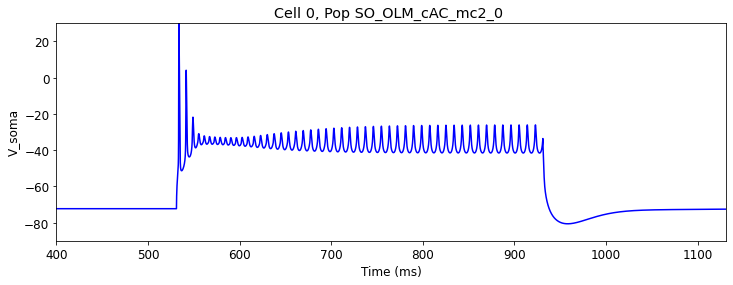

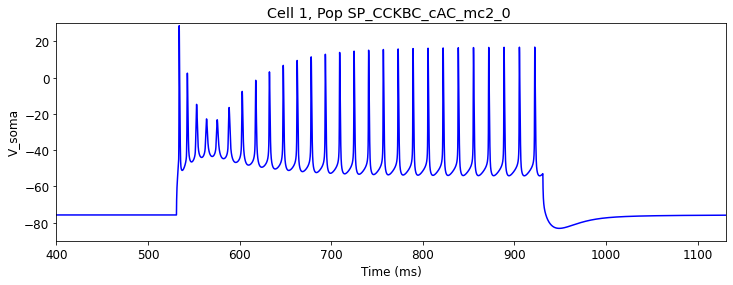

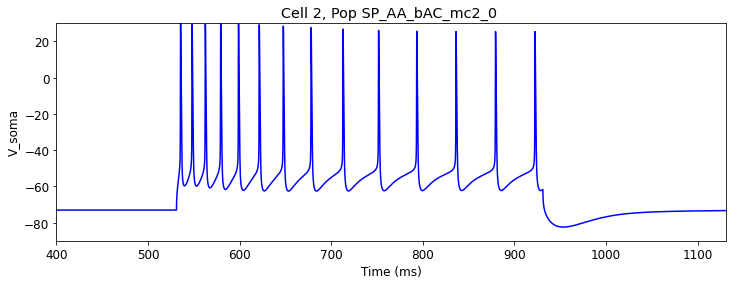

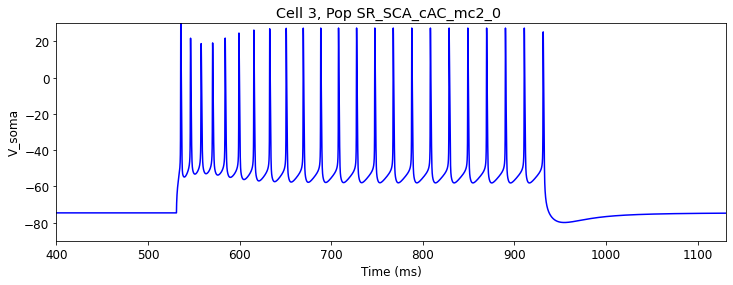

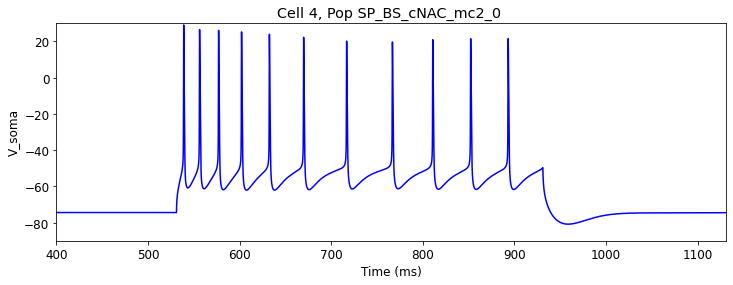

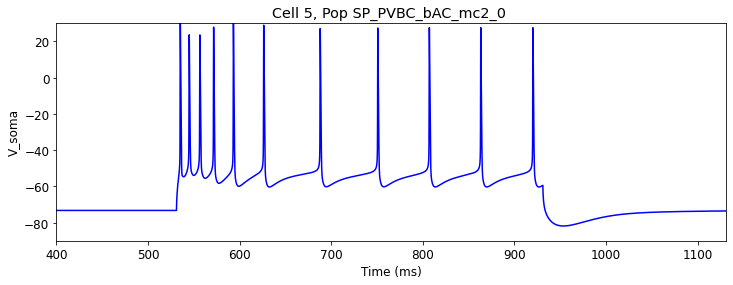

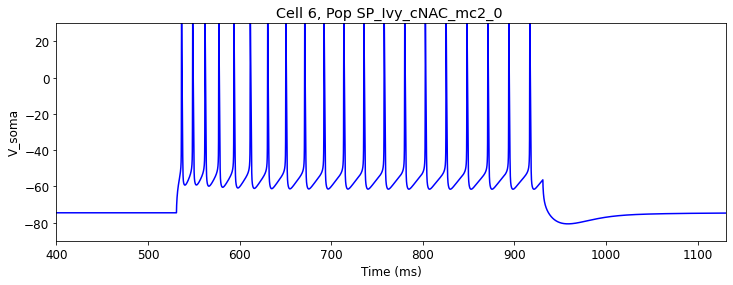

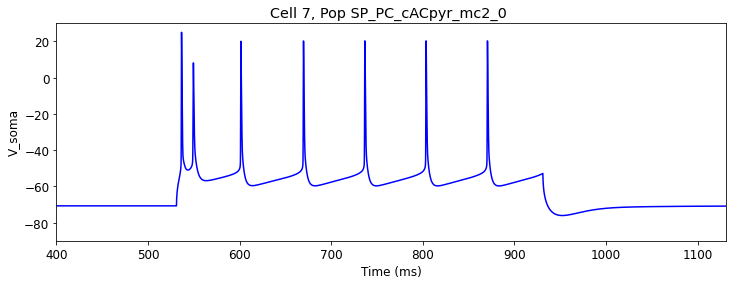

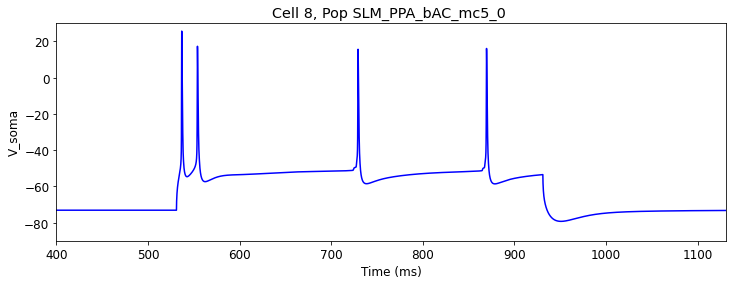

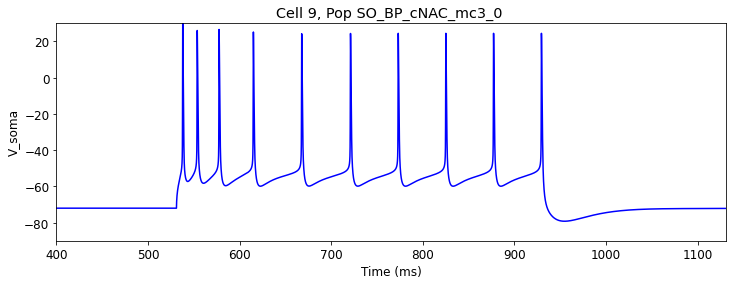

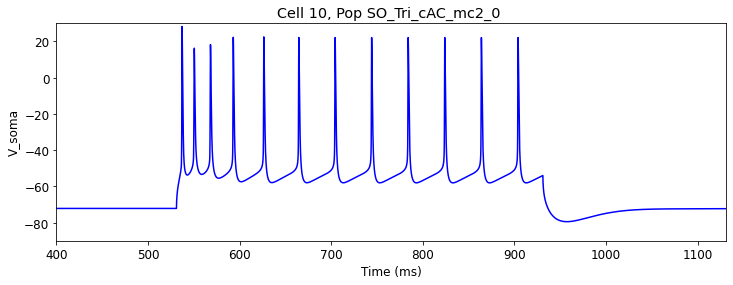

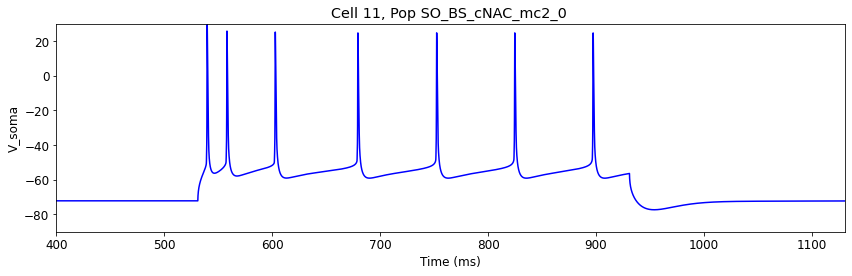

Plotting 3D cell shape ...
  There was an exception in plotShape(): 
    'Axes3DSubplot' object has no attribute 'set_box_aspect' 
    (<class 'AttributeError'>, AttributeError("'Axes3DSubplot' object has no attribute 'set_box_aspect'"), <traceback object at 0x7fbbad536230>)
Plotting 2D representation of network cell locations and connections...


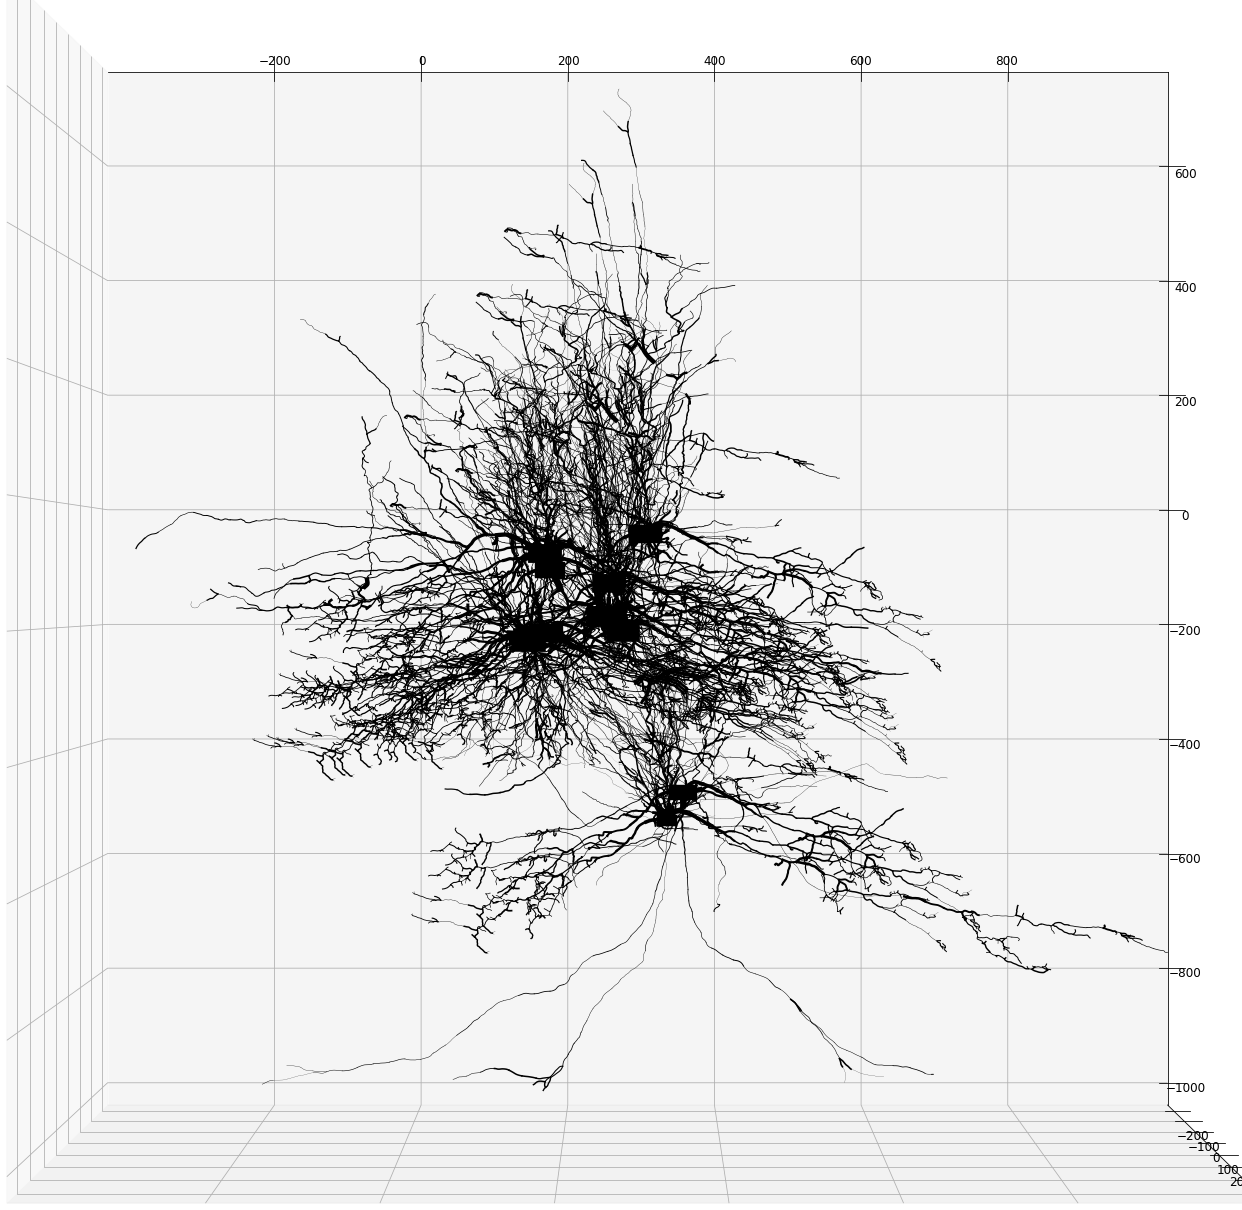

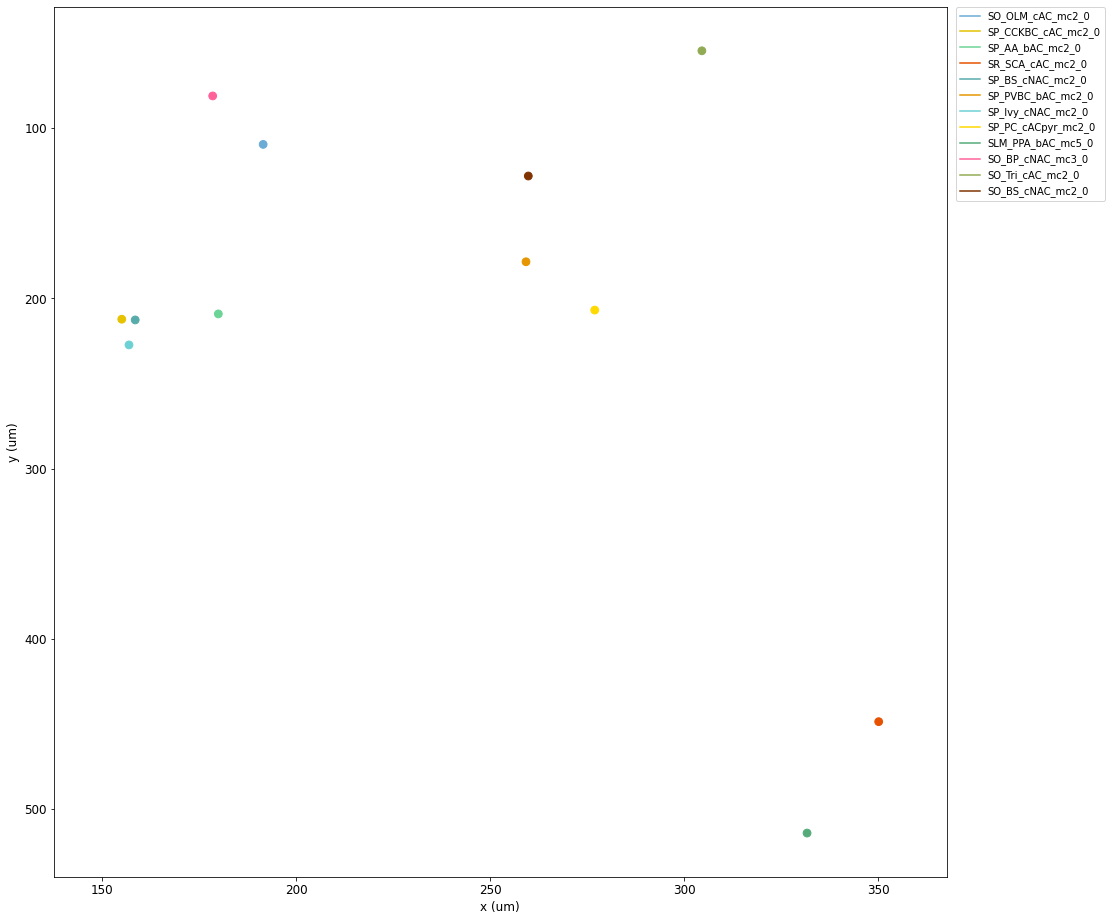

  Done; plotting time = 39.57 s

Total time = 7740.58 s

End time:  2021-09-29 13:47:32.841795


In [ ]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

# Rede 1 cell per pop (I = 1.0 mA)


Gathering data...
  Done; gather time = 4.09 s.

Analyzing...
  Cells: 12
  Connections: 43 (3.58 per cell)
  Synaptic contacts: 430 (35.83 per cell)
  Spikes: 97 (7.15 Hz)
  Simulated time: 1.1 s; 1 workers
  Run time: 12501.87 s
Saving output as ../data/v0_batch0/v0_batch0.json  ... 
Finished saving!
  Done; saving time = 2.67 s.
Plotting recorded cell traces ... cell


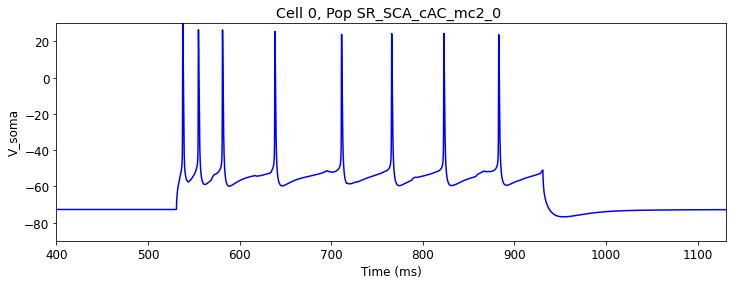

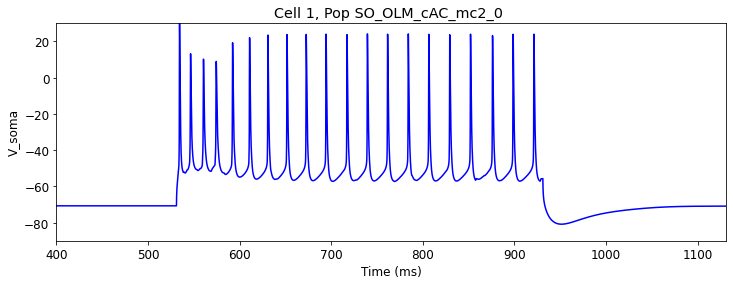

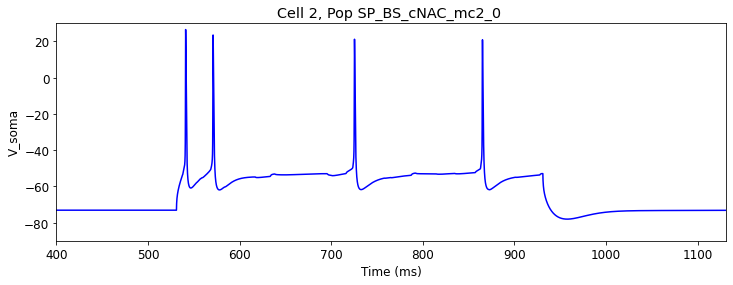

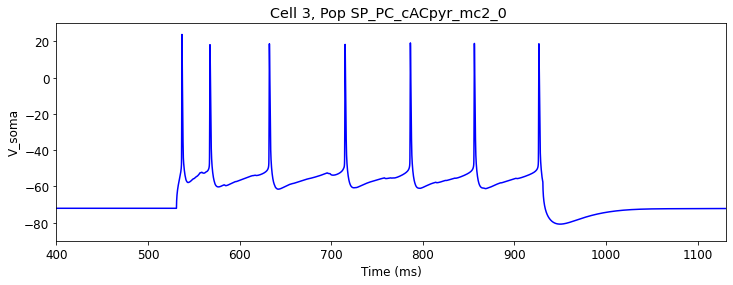

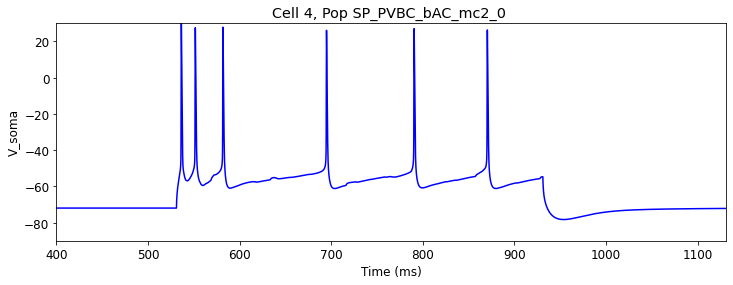

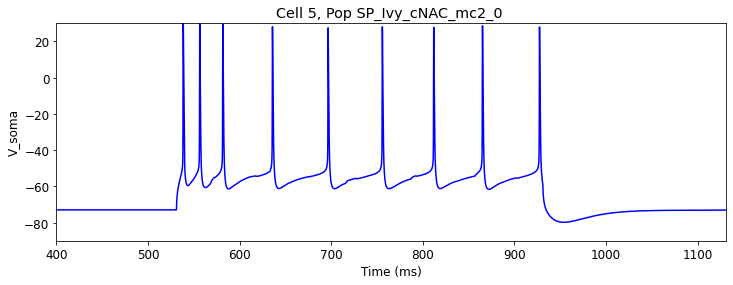

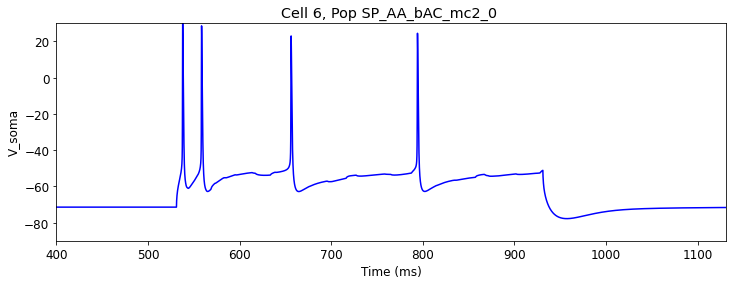

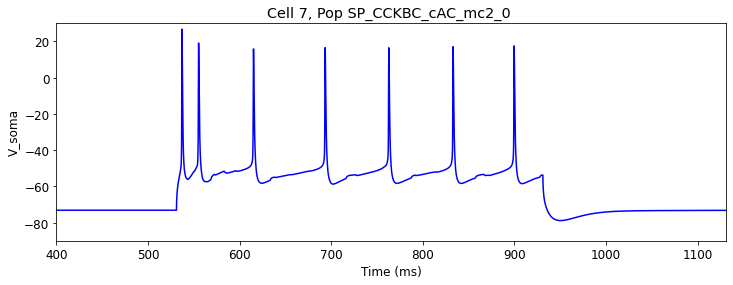

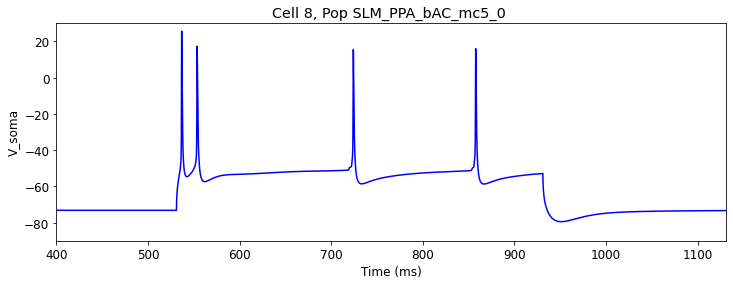

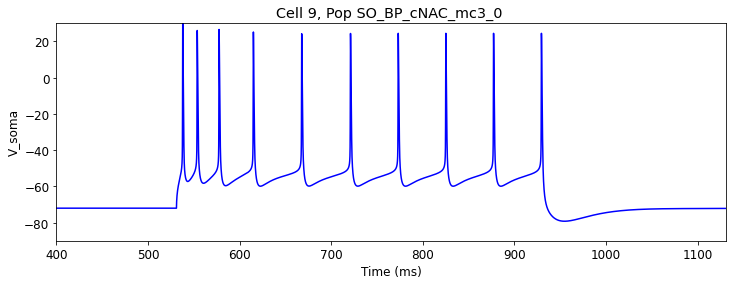

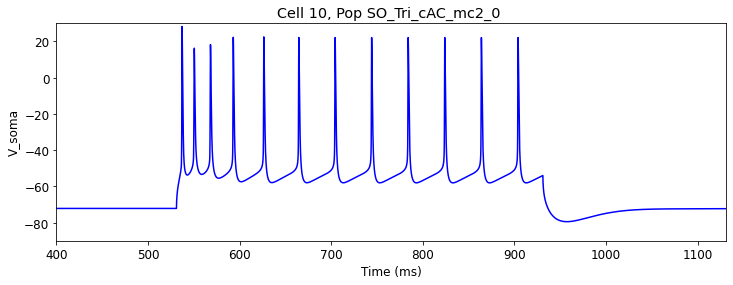

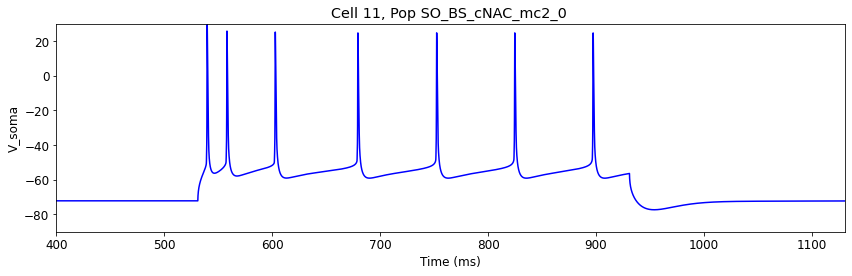

Plotting 3D cell shape ...
  There was an exception in plotShape(): 
    'Axes3DSubplot' object has no attribute 'set_box_aspect' 
    (<class 'AttributeError'>, AttributeError("'Axes3DSubplot' object has no attribute 'set_box_aspect'"), <traceback object at 0x7f3a6a275910>)
Plotting 2D representation of network cell locations and connections...


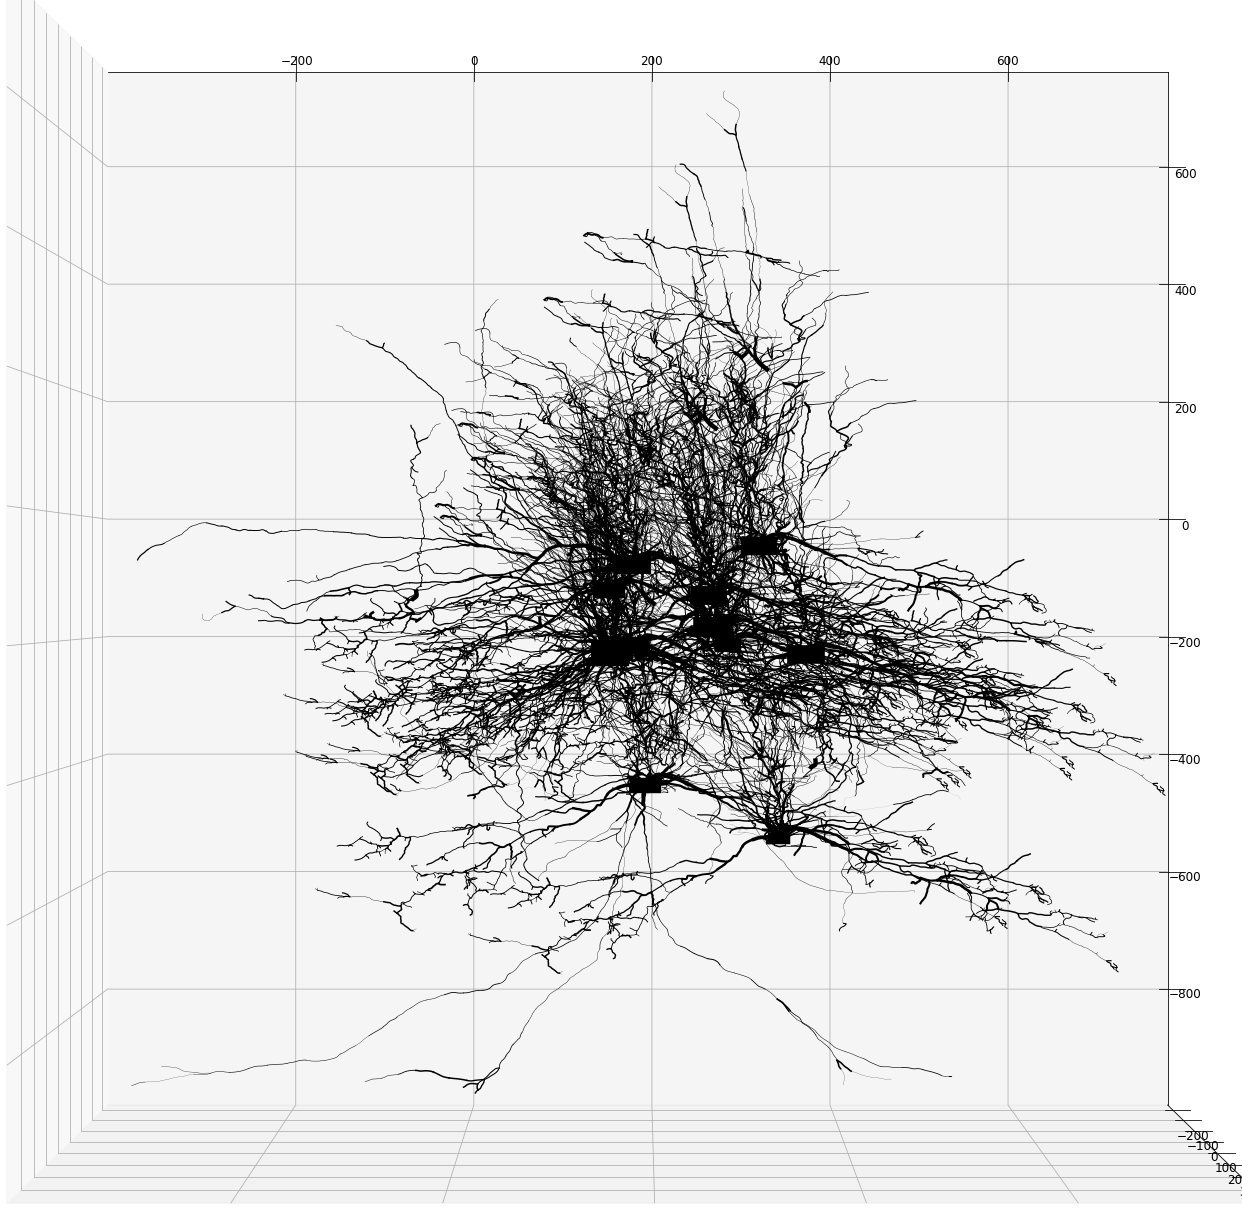

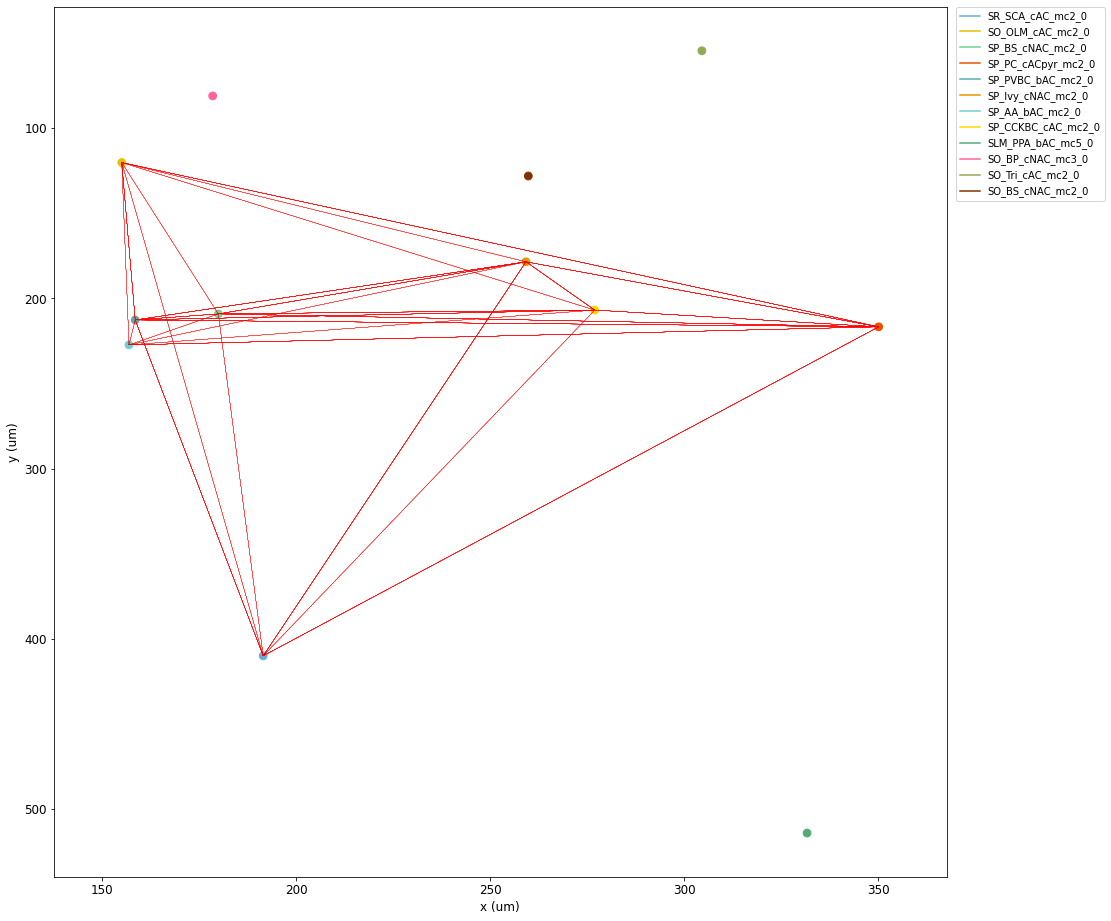

  Done; plotting time = 43.99 s

Total time = 12561.62 s

End time:  2021-09-29 05:53:12.665651


In [ ]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc